In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pingouin as pg
import plotly.express as px
from datetime import date
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r'c:\Users\meltahir\Downloads\Sample-Superstore.csv', encoding='cp1252')

#print(df)
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

In [4]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [5]:
df.describe(include='all')

Row ID        Order ID Order Date   Ship Date       Ship Mode  \
count   9994.000000            9994       9994        9994            9994   
unique          NaN            5009       1237        1334               4   
top             NaN  CA-2017-100111   9/5/2016  12/16/2015  Standard Class   
freq            NaN              14         38          35            5968   
mean    4997.500000             NaN        NaN         NaN             NaN   
std     2885.163629             NaN        NaN         NaN             NaN   
min        1.000000             NaN        NaN         NaN             NaN   
25%     2499.250000             NaN        NaN         NaN             NaN   
50%     4997.500000             NaN        NaN         NaN             NaN   
75%     7495.750000             NaN        NaN         NaN             NaN   
max     9994.000000             NaN        NaN         NaN             NaN   

       Customer ID  Customer Name   Segment        Country           City  \
count         9994           9994      9994           9994           9994   
unique         793            793         3              1            531   
top       WB-21850  William Brown  Consumer  United States  New York City   
freq            37             37      5191           9994            915   
mean           NaN            NaN       NaN            NaN            NaN   
std            NaN            NaN       NaN            NaN            NaN   
min            NaN            NaN       NaN            NaN            NaN   
25%            NaN            NaN       NaN            NaN            NaN   
50%            NaN            NaN       NaN            NaN            NaN   
75%            NaN            NaN       NaN            NaN            NaN   
max            NaN            NaN       NaN            NaN            NaN   

        ...   Postal Code  Region       Product ID         Category  \
count   ...   9994.000000    9994             9994             9994   
unique  ...           NaN       4             1862                3   
top     ...           NaN    West  OFF-PA-10001970  Office Supplies   
freq    ...           NaN    3203               19             6026   
mean    ...  55190.379428     NaN              NaN              NaN   
std     ...  32063.693350     NaN              NaN              NaN   
min     ...   1040.000000     NaN              NaN              NaN   
25%     ...  23223.000000     NaN              NaN              NaN   
50%     ...  56430.500000     NaN              NaN              NaN   
75%     ...  90008.000000     NaN              NaN              NaN   
max     ...  99301.000000     NaN              NaN              NaN   

       Sub-Category     Product Name         Sales     Quantity     Discount  \
count          9994             9994   9994.000000  9994.000000  9994.000000   
unique           17             1850           NaN          NaN          NaN   
top         Binders  Staple envelope           NaN          NaN          NaN   
freq           1523               48           NaN          NaN          NaN   
mean            NaN              NaN    229.858001     3.789574     0.156203   
std             NaN              NaN    623.245101     2.225110     0.206452   
min             NaN              NaN      0.444000     1.000000     0.000000   
25%             NaN              NaN     17.280000     2.000000     0.000000   
50%             NaN              NaN     54.490000     3.000000     0.200000   
75%             NaN              NaN    209.940000     5.000000     0.200000   
max             NaN              NaN  22638.480000    14.000000     0.800000   

             Profit  
count   9994.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean      28.656896  
std      234.260108  
min    -6599.978000  
25%        1.728750  
50%        8.666500  
75%       29.364000  
max     8399.976000  

[11 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [7]:
df['Profitable'] = np.where(df['Profit'] >= 0, 1, 0)

In [15]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ... Region  \
0      Claire Gute   Consumer  United States        Henderson  ...  South   
1      Claire Gute   Consumer  United States        Henderson  ...  South   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   West   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  South   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

   Discount    Profit  Profitable  
0      0.00   41.9136           1  
1      0.00  219.5820           1  
2      0.00    6.8714           1  
3      0.45 -383.0310           0  
4      0.20    2.5164           1  

[5 rows x 22 columns]

In [16]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Profitable       0
dtype: int64

In [17]:
df.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
Profitable          2
dtype: int64

<AxesSubplot:title={'center':'Profit by Region'}, xlabel='Region'>

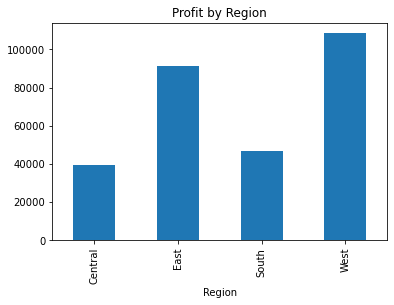

In [18]:
Region_Category_Profit=df.groupby(['Region','Category'])['Profit'].sum()
df.groupby(['Region'])['Profit'].sum().plot.bar(title='Profit by Region')

<AxesSubplot:title={'center':'Number of Products in each of the Sub-Categories'}, ylabel='Category,Sub-Category'>

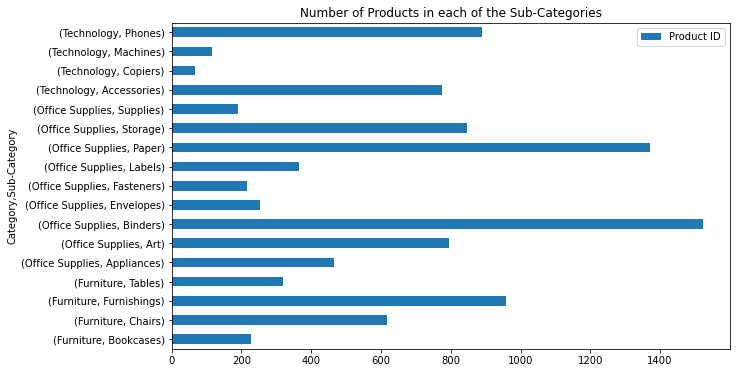

In [19]:
Products_in_Category=df.groupby('Category')['Product ID'].count()
Products_in_SubCategory=df.groupby(['Category','Sub-Category'])['Product ID'].count()
Products_in_SubCategory=pd.DataFrame(Products_in_SubCategory)
Products_in_SubCategory.plot.barh(title='Number of Products in each of the Sub-Categories', figsize=(10,6))

In [20]:
print(Products_in_SubCategory)

                              Product ID
Category        Sub-Category            
Furniture       Bookcases            228
                Chairs               617
                Furnishings          957
                Tables               319
Office Supplies Appliances           466
                Art                  796
                Binders             1523
                Envelopes            254
                Fasteners            217
                Labels               364
                Paper               1370
                Storage              846
                Supplies             190
Technology      Accessories          775
                Copiers               68
                Machines             115
                Phones               889


In [21]:
data = pd.pivot_table(df,values= "Profit", index= "Order Date", columns= "Category")
data =data.fillna(0)
data['Total Profit']=data['Furniture']+data['Office Supplies']+data['Technology']
data.sort_values('Total Profit',ascending=False)[:20][:]

Category     Furniture  Office Supplies   Technology  Total Profit
Order Date                                                        
10/2/2016     0.000000        56.470183  8399.976000   8456.446183
3/23/2017    76.262400         3.730733  6719.980800   6799.973933
2/2/2016    -35.185500        12.049000  2799.984000   2776.847500
1/22/2017     0.000000        16.274820  1379.977000   1396.251820
10/4/2016   -10.667200        22.647467  1305.855900   1317.836167
1/16/2017    21.916633      1264.726550     0.000000   1286.643183
4/16/2016     3.286800        14.120550  1187.167100   1204.574450
11/17/2017   31.261400        57.407811  1063.241000   1151.910211
10/22/2017  -31.564733        14.530020  1140.467675   1123.432962
5/8/2017    -12.919500        18.608800  1049.985000   1055.674300
3/1/2016   -264.920800        58.690800  1207.482150   1001.252150
4/27/2015   316.882500         4.288533   648.562400    969.733433
1/6/2014    746.407800        48.976867   158.891700    954.276367
3/21/2014    -2.164200        18.715013   909.981800    926.532613
6/17/2017    46.575000        -4.403550   838.156100    880.327550
7/24/2017     0.000000         0.000000   839.986000    839.986000
1/26/2017    24.460800         3.778225   764.381800    792.620825
3/19/2015   -67.670400        52.970120   760.077500    745.377220
12/14/2014  -19.181850        -5.451750   760.230733    735.597133
12/3/2016    15.442171        37.222625   659.980000    712.644796

In [22]:
pd.DataFrame(df.groupby(['Product ID','Product Name'])['Profit'].sum().nlargest(20))

Profit
Product ID      Product Name                                                  
TEC-CO-10004722 Canon imageCLASS 2200 Advanced Copier               25199.9280
OFF-BI-10003527 Fellowes PB500 Electric Punch Plastic Comb Bind...   7753.0390
TEC-CO-10001449 Hewlett Packard LaserJet 3310 Copier                 6983.8836
TEC-CO-10003763 Canon PC1060 Personal Laser Copier                   4570.9347
TEC-MA-10001127 HP Designjet T520 Inkjet Large Format Printer -...   4094.9766
TEC-MA-10003979 Ativa V4110MDD Micro-Cut Shredder                    3772.9461
TEC-MA-10001047 3D Systems Cube Printer, 2nd Generation, Magenta     3717.9714
TEC-AC-10002049 Plantronics Savi W720 Multi-Device Wireless Hea...   3696.2820
OFF-BI-10001120 Ibico EPK-21 Electric Binding System                 3345.2823
TEC-MA-10000045 Zebra ZM400 Thermal Label Printer                    3343.5360
OFF-AP-10002945 Honeywell Enviracaire Portable HEPA Air Cleaner...   3247.0200
TEC-CO-10002095 Hewlett Packard 610 Color Digital Copier / Printer   3124.9375
TEC-AC-10003033 Plantronics CS510 - Over-the-Head monaural Wire...   3085.0325
TEC-CO-10001046 Canon Imageclass D680 Copier / Fax                   2799.9600
OFF-BI-10003925 Fellowes PB300 Plastic Comb Binding Machine          2518.0551
OFF-BI-10004600 Ibico Ibimaster 300 Manual Binding System            2318.3370
TEC-AC-10003870 Logitech Z-906 Speaker sys - home theater - 5.1-CH   2243.9320
OFF-BI-10001359 GBC DocuBind TL300 Electric Binding System           2233.5051
TEC-AC-10001838 Razer Tiamat Over Ear 7.1 Surround Sound PC Gam...   2155.8922
TEC-CO-10001766 Canon PC940 Copier                                   2092.4535

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

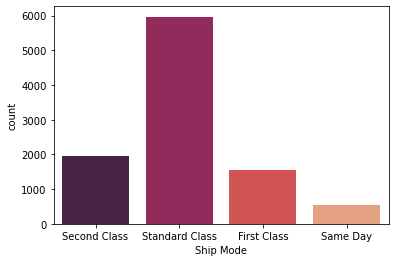

In [23]:
sns.countplot(x=df['Ship Mode'],palette='rocket')

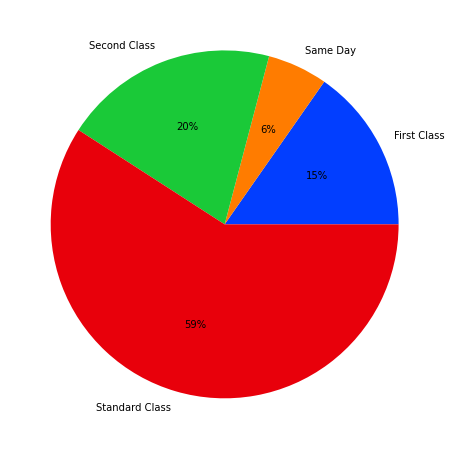

In [24]:
var=df.loc[:,["Ship Mode","Sales"]]
var=var.groupby(by=["Ship Mode"]).sum()
labels=[]
for i in var.index:
    labels.append(i)  
plt.figure(figsize=(8,8))
colors = sns.color_palette('bright')
plt.pie(var["Sales"],colors = colors,labels=labels, autopct = '%0.0f%%')
plt.show()

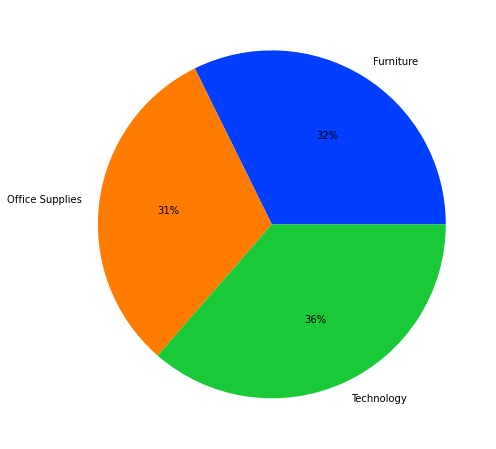

In [25]:
var=df.loc[:,["Category","Sales"]]
var=var.groupby(by=["Category"]).sum()
labels=[]
for i in var.index:
    labels.append(i)  
plt.figure(figsize=(8,8))
colors = sns.color_palette('bright')
plt.pie(var["Sales"],colors = colors,labels=labels,autopct = '%0.0f%%')
plt.show()

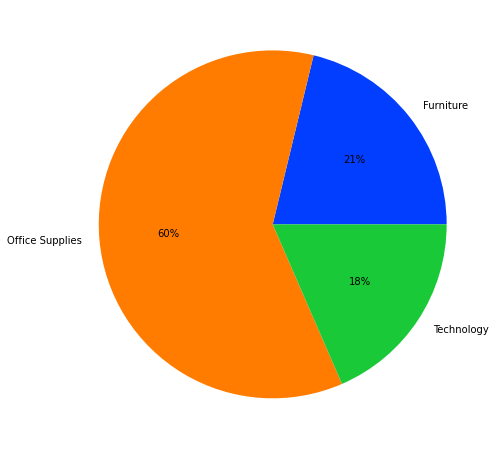

In [26]:
var=df.loc[:,["Category","Profit"]]
var=var.groupby(by=["Category"]).count()
labels=[]
for i in var.index:
    labels.append(i)  
plt.figure(figsize=(8,8))
colors = sns.color_palette('bright')
plt.pie(var["Profit"],colors = colors,labels=labels,autopct = '%0.0f%%')
plt.show()

In [27]:
df['year']=pd.DatetimeIndex(df['Order Date']).year
df['month']=pd.DatetimeIndex(df['Order Date']).month

<AxesSubplot:title={'center':'Profit by Category'}, xlabel='Category'>

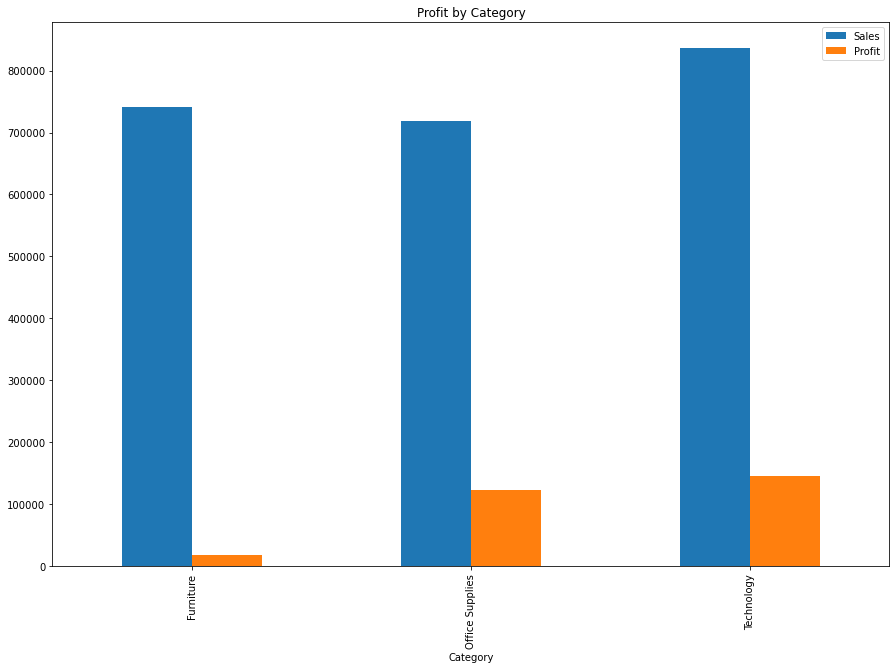

In [28]:
df.groupby(['Category'])['Sales','Profit'].sum().plot.bar(title='Profit by Category' , figsize=(15, 10))

<AxesSubplot:title={'center':'Total # of Sub-Category'}, xlabel='Category'>

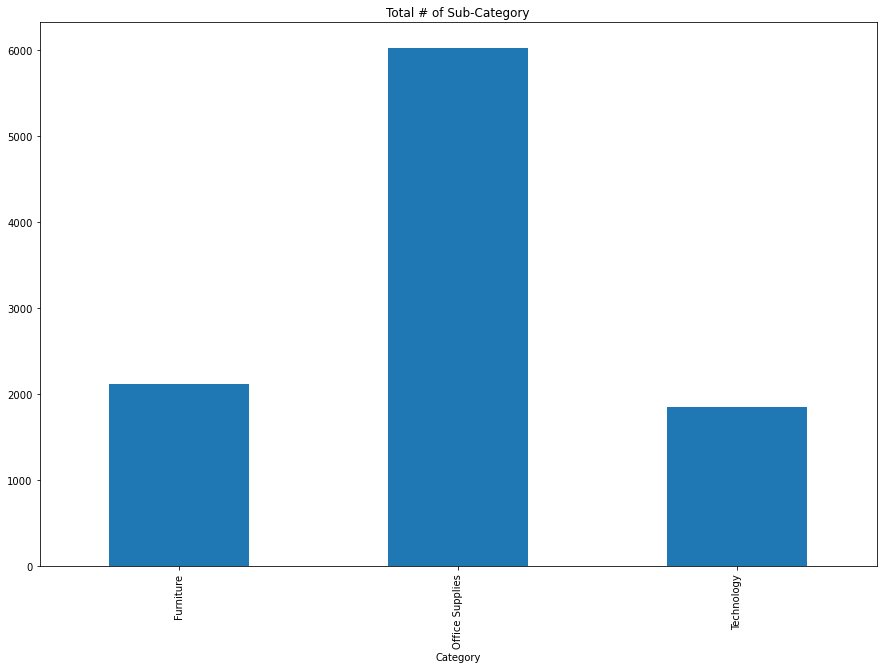

In [29]:
df.groupby(['Category'])['Sub-Category'].count().plot.bar(title='Total # of Sub-Category' , figsize=(15, 10))

<AxesSubplot:title={'center':'Profit by Category'}, xlabel='Sub-Category'>

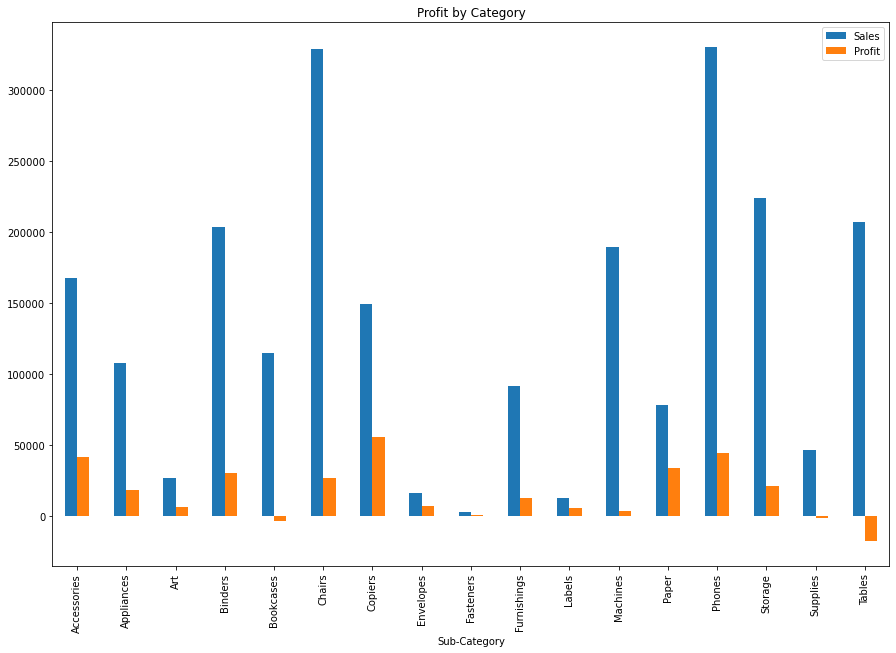

In [30]:
df.groupby(['Sub-Category'])['Sales','Profit'].sum().plot.bar(title='Profit by Category' , figsize=(15, 10))

<AxesSubplot:title={'center':'Annual Profit by Region'}, xlabel='year'>

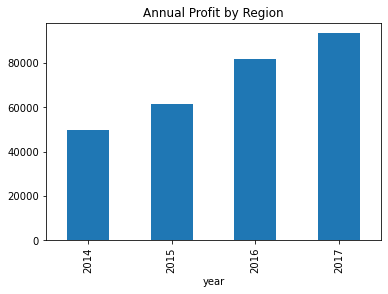

In [31]:
df.groupby(['year'])['Profit'].sum().plot.bar(title='Annual Profit by Region')

<AxesSubplot:title={'center':'Annual Profit by Region'}, xlabel='year'>

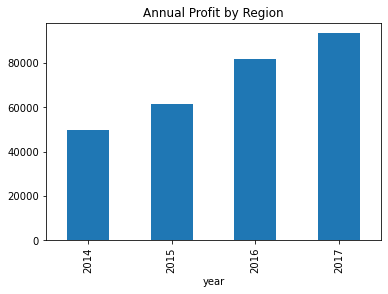

In [32]:
df.groupby(['year'])['Profit'].sum().plot.bar(title='Annual Profit by Region')


<AxesSubplot:title={'center':'Annual Profit by Region'}, xlabel='month'>

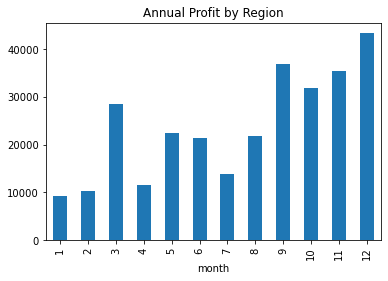

In [33]:
df.groupby(['month'])['Profit'].sum().plot.bar(title='Annual Profit by Region')

In [34]:
df.head()

Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

          Category  Sub-Category  \
0        Furniture     Bookcases   
1        Furniture        Chairs   
2  Office Supplies        Labels   
3        Furniture        Tables   
4  Office Supplies       Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  Profitable  year  month  
0     0.00   41.9136           1  2016     11  
1     0.00  219.5820           1  2016     11  
2     0.00    6.8714           1  2016      6  
3     0.45 -383.0310           0  2015     10  
4     0.20    2.5164           1  2015     10  

[5 rows x 24 columns]

In [35]:
fig = px.density_heatmap(df, x='year', y='Category', z='Profit', 
                         color_continuous_scale="Viridis")
fig

# You can add histograms
fig = px.density_heatmap(df, x='year', y='Category', z='Profit', 
                         marginal_x="histogram", marginal_y="histogram")
fig

In [36]:
cities_by_profit = df.groupby(['City', 'State'])['Profit'].sum()
cities_by_profit_df = cities_by_profit.reset_index(level=1)
cities_by_profit_df = cities_by_profit_df[cities_by_profit_df['Profit'] > 0]

fig = px.scatter(cities_by_profit_df, x=cities_by_profit_df.index, y='Profit', color='State', size='Profit')
fig.show()

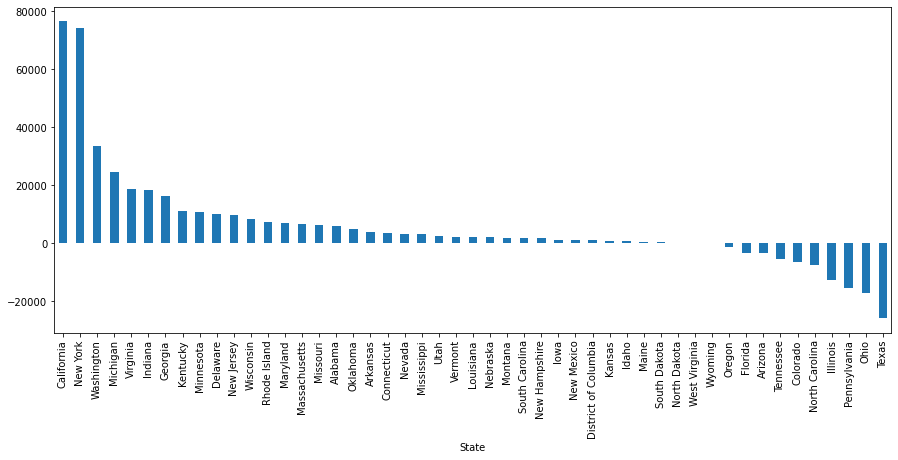

In [37]:
store_profit_sorted = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(15,6))
ax = store_profit_sorted.plot.bar()

<AxesSubplot:xlabel='Category', ylabel='Profit'>

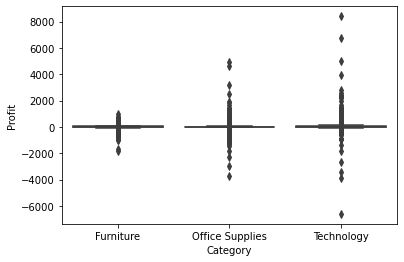

In [38]:
sns.boxplot(x='Category', y='Profit', data=df)

In [40]:
for k,v in X.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 2.5 * iqr ) | (v >=q3 + 2.5 * iqr )]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(X)[0]
    print("%s Outliers = %.2f%%"  % (k,perc))

NameError: name 'X' is not defined

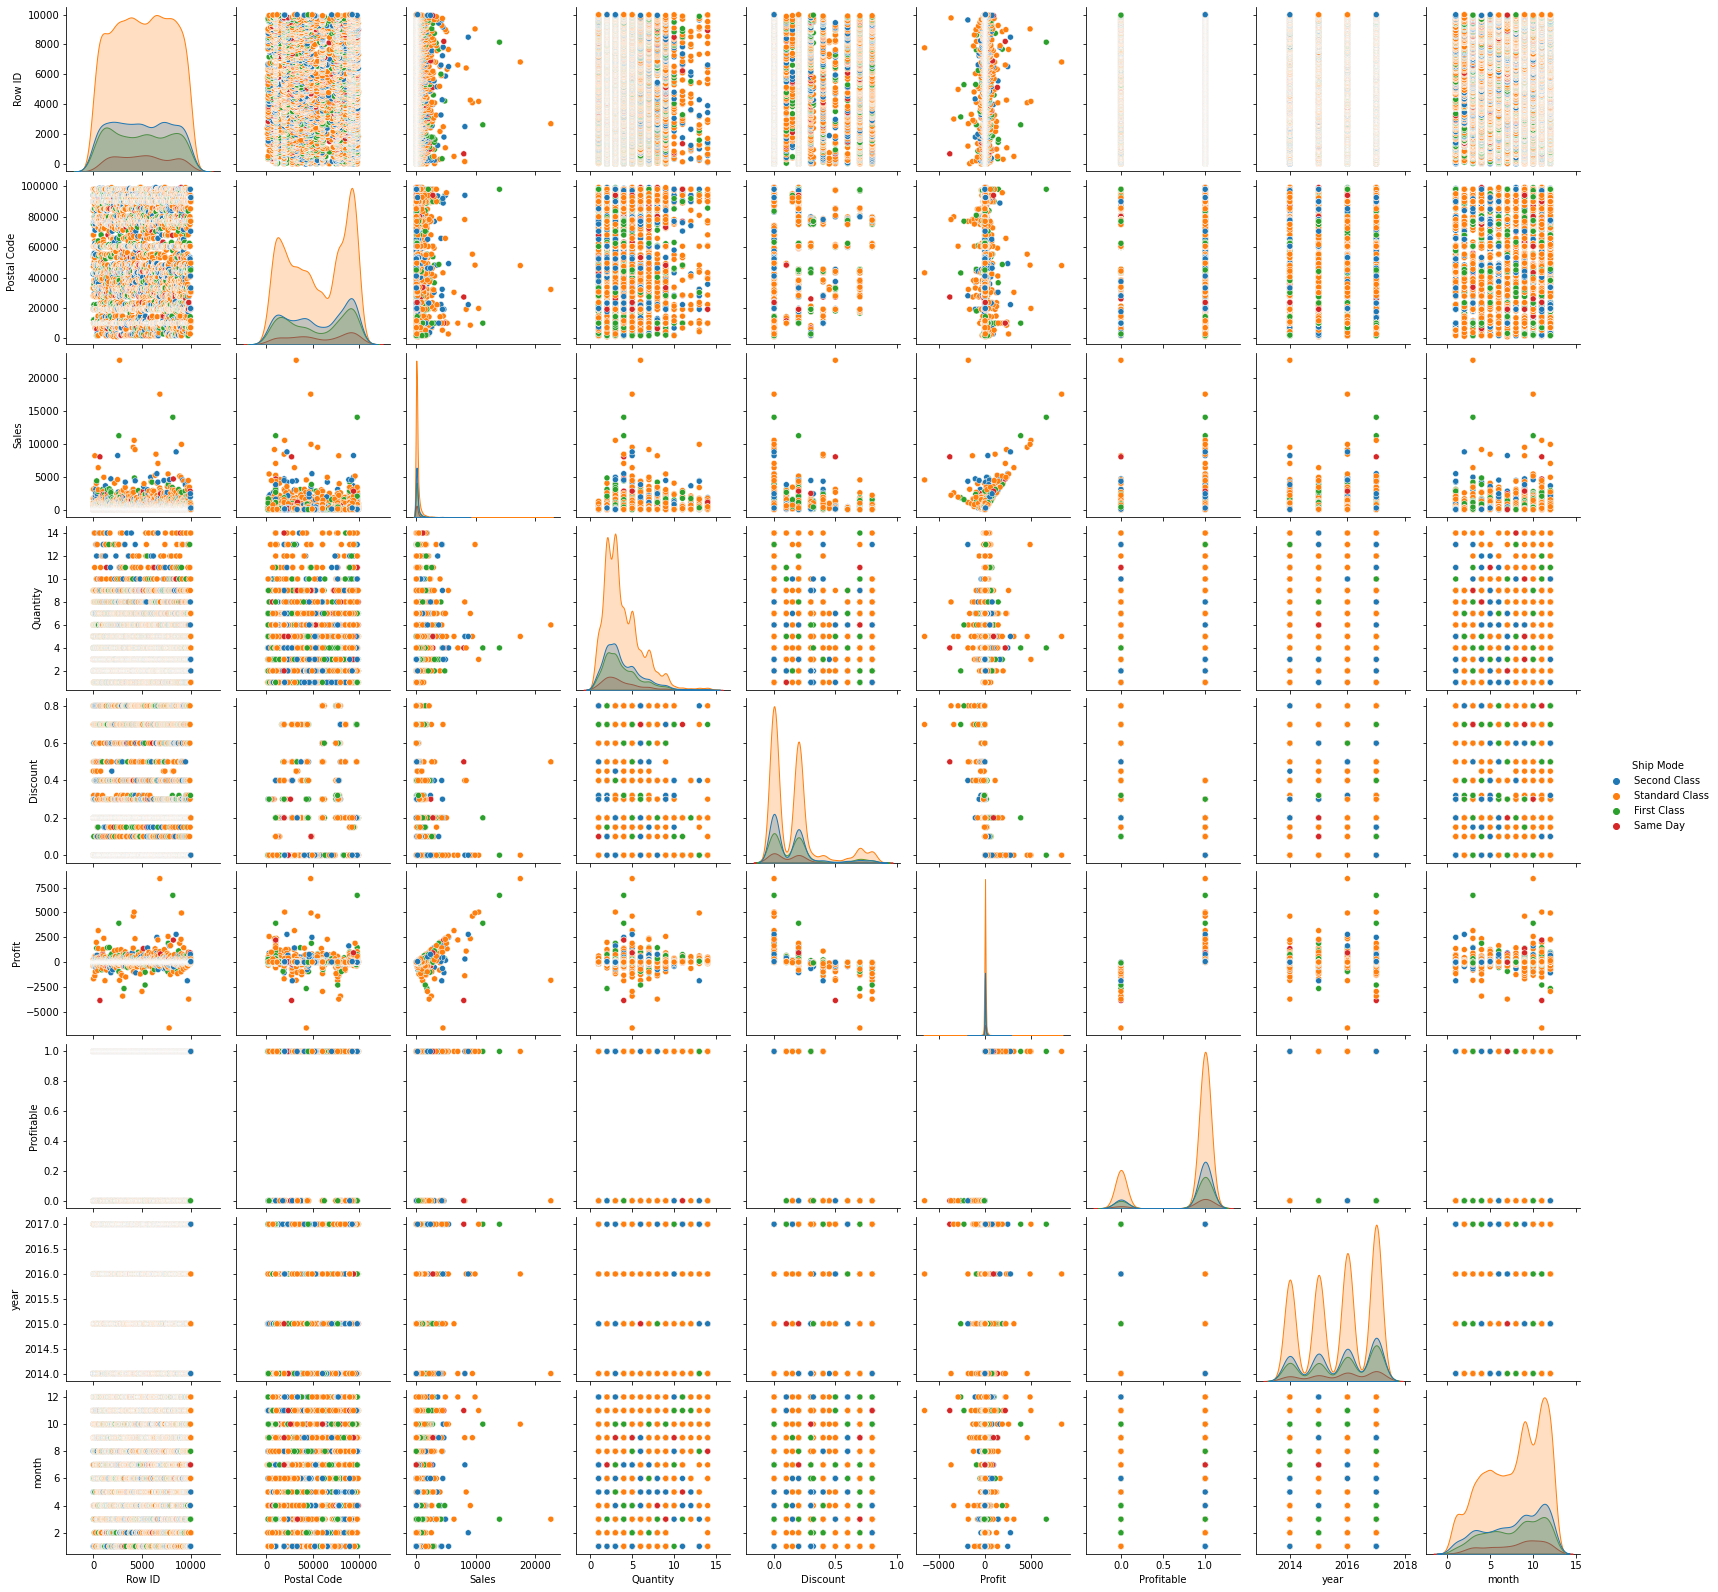

In [41]:
sns.pairplot(df, hue='Ship Mode' )

In [42]:
df.corr()

Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
Row ID       1.000000     0.009671 -0.001359 -0.004016  0.013480  0.012497   
Postal Code  0.009671     1.000000 -0.023854  0.012761  0.058443 -0.029961   
Sales       -0.001359    -0.023854  1.000000  0.200795 -0.028190  0.479064   
Quantity    -0.004016     0.012761  0.200795  1.000000  0.008623  0.066253   
Discount     0.013480     0.058443 -0.028190  0.008623  1.000000 -0.219487   
Profit       0.012497    -0.029961  0.479064  0.066253 -0.219487  1.000000   
Profitable  -0.021038    -0.011986 -0.015905  0.005798 -0.754819  0.229682   
year         0.015430     0.004299 -0.009679 -0.005810 -0.002662  0.004670   
month       -0.018732     0.026234 -0.000625  0.023355 -0.004935 -0.000502   

             Profitable      year     month  
Row ID        -0.021038  0.015430 -0.018732  
Postal Code   -0.011986  0.004299  0.026234  
Sales         -0.015905 -0.009679 -0.000625  
Quantity       0.005798 -0.005810  0.023355  
Discount      -0.754819 -0.002662 -0.004935  
Profit         0.229682  0.004670 -0.000502  
Profitable     1.000000  0.002580  0.003118  
year           0.002580  1.000000 -0.020183  
month          0.003118 -0.020183  1.000000

In [43]:
from scipy.stats import pearsonr
pearsonr(df['Profit'],df['Discount'])

(-0.21948745637176442, 2.702294436246226e-109)

In [44]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
g1=df['Profit'][df['Category'] == 'Furniture']
g2=df['Profit'][df['Category'] == 'Office Supplies']
g3=df['Profit'][df['Category'] == 'Technology']

In [ ]:
stats.levene(df['Profit'][df['Category'] == 'Furniture'],
             df['Profit'][df['Category'] == 'Office Supplies'],
             df['Profit'][df['Category'] == 'Technology'])

In [ ]:
df.groupby('Category')['Profit'].describe()

In [ ]:
pg.pairwise_gameshowell(dv='Profit', between='Category', data=df)

In [ ]:
stats.shapiro(g1)

In [ ]:
stats.shapiro(g2)

In [ ]:
stats.shapiro(g3)

In [ ]:
#X = df.drop(['Country'], axis=1)
#y = df['Country']

In [ ]:
df.head()

In [45]:
X = df

In [46]:
X["Ship Mode"].replace("Same Day", 0, inplace=True)
X["Ship Mode"].replace("First Class", 1, inplace=True)
X["Ship Mode"].replace("Second Class", 2, inplace=True)
X["Ship Mode"].replace("Standard Class", 3, inplace=True)

X["Segment"].replace("Consumer", 0, inplace=True)
X["Segment"].replace("Corporate", 1, inplace=True)
X["Segment"].replace("Home Office", 2, inplace=True)

X["Category"].replace("Furniture", 0, inplace=True)
X["Category"].replace("Office Supplies", 1, inplace=True)
X["Category"].replace("Technology", 2, inplace=True)

X["Region"].replace("South", 0, inplace=True)
X["Region"].replace("West", 1, inplace=True)
X["Region"].replace("Central", 2, inplace=True)
X["Region"].replace("East", 3, inplace=True)

X["Country"].replace("United States", 0, inplace=True)

In [47]:
X = X.drop(['City'], axis=1)
X = X.drop(['State'], axis=1)
X = X.drop(['Sub-Category'], axis=1)
X = X.drop(['Order Date'], axis=1)
X = X.drop(['Ship Date'], axis=1)
X = X.drop(['Customer Name'], axis=1)
X = X.drop(['Customer ID'], axis=1)
X = X.drop(['Product ID'], axis=1)
X = X.drop(['Order ID'], axis=1)
X = X.drop(['Row ID'], axis=1)
X = X.drop(['Product Name'], axis=1)
X = X.drop(['year'], axis=1)
X = X.drop(['month'], axis=1)
X = X.drop(['Postal Code'], axis=1)

In [48]:
X["Ship Mode"] = X['Ship Mode'].astype('float')
X["Segment"] = X['Segment'].astype('float')
X["Category"] = X['Category'].astype('float')
X["Country"] = X['Country'].astype('int')

In [49]:
y = X['Profitable']

In [50]:
X = X.drop(['Profitable'], axis=1)

In [51]:
X = X.drop(['Profit'], axis=1)

In [52]:
X.columns

Index(['Ship Mode', 'Segment', 'Country', 'Region', 'Category', 'Sales',
       'Quantity', 'Discount'],
      dtype='object')

In [53]:
X.dtypes

Ship Mode    float64
Segment      float64
Country        int32
Region         int64
Category     float64
Sales        float64
Quantity       int64
Discount     float64
dtype: object

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
model = LogisticRegression(multi_class='ovr')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [55]:
model

LogisticRegression(multi_class='ovr')

In [56]:
scaler= StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
model.fit(X,y)

LogisticRegression(multi_class='ovr')

In [77]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: Profitable, dtype: int32

In [58]:
prediction = model.predict(X)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y,prediction))
print(confusion_matrix(y,prediction))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82      1871
           1       0.94      0.99      0.96      8123

    accuracy                           0.94      9994
   macro avg       0.95      0.85      0.89      9994
weighted avg       0.94      0.94      0.94      9994

[[1337  534]
 [  61 8062]]


In [59]:
"""K-FOLD CROSSVALIDATION"""
from sklearn.model_selection import cross_val_score
clf = LogisticRegression()
cross_val_score(clf,X,y,cv=4)

array([0.94397759, 0.94757903, 0.938751  , 0.94235388])

In [60]:
cross_val_score(clf,X,y,cv=4).mean()

0.9431653766390463

In [61]:
LR = LogisticRegression()
scores=cross_val_score(LR,X,y,cv=5)
LR_score=scores.mean()
LR_score

0.942765777283036

In [92]:
LR = LogisticRegression()
scores=cross_val_score(LR,X,y,cv=5,scoring='f1')
LR_f1score=scores.mean()
LR_f1score

C:\Users\meltahir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\meltahir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\meltahir\anaconda3\lib\site

0.9658658162185816

In [ ]:
df['Sub-Category'].unique()

In [ ]:
df['Category'].unique()

In [ ]:
X.head()

# Applying Decesion Tree Alogroithm to classify the data

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [63]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy" , max_depth=3, min_samples_leaf=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [64]:
y_pred = clf_entropy.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [65]:
y_test

7933    1
8657    1
9599    1
799     1
3813    1
       ..
2890    1
4890    1
2738    1
5981    1
6087    1
Name: Profitable, Length: 1999, dtype: int32

In [66]:
accuracy_score(y_test,y_pred)*100

94.74737368684342

# knn modelling

In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
model3 = KNeighborsClassifier()

model3.fit(X_train,y_train)

y_pred3 = model3.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred3)

0.8299149574787393

In [98]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.58      0.27      0.37       369
           1       0.85      0.96      0.90      1630

    accuracy                           0.83      1999
   macro avg       0.72      0.61      0.64      1999
weighted avg       0.80      0.83      0.80      1999



In [99]:
scores = []
for i in range(1,20):# range(1,20)
    clf3 = KNeighborsClassifier(n_neighbors=i)
    scores.append(cross_val_score(clf3,X,y,cv=4).mean())

Text(0.5, 1.0, 'Finding optimal K')

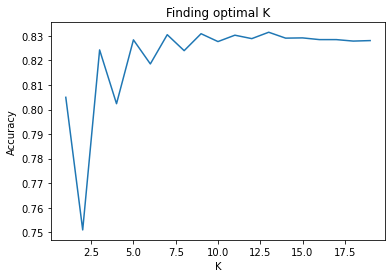

In [100]:
plt.plot(range(1,20),scores)
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Finding optimal K")

In [101]:
max(scores)

0.8314990928316883

# Perceptron

In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
param= {'n_neighbors':(5,6,7)}

In [104]:
from sklearn.linear_model import Perceptron
model5 = Perceptron()#default max_iter=1000 ,eta0=1.0

model5.fit(X_train,y_train)

y_pred5 = model5.predict(X_test)

In [105]:
accuracy_score(y_test,y_pred5)

0.19309654827413708

In [106]:
model5.coef_

array([[  -62.    ,   399.    ,     0.    , -1000.    ,  2339.    ,
         -514.0384,   283.    , -3557.26  ]])

In [107]:
confusion_matrix(y_test,y_pred5)

array([[ 369,    0],
       [1613,   17]], dtype=int64)

In [108]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.19      1.00      0.31       369
           1       1.00      0.01      0.02      1630

    accuracy                           0.19      1999
   macro avg       0.59      0.51      0.17      1999
weighted avg       0.85      0.19      0.07      1999



# SGD (Stochastic Gradient Descent)

In [109]:
from sklearn.linear_model import SGDClassifier

In [110]:
sgd= SGDClassifier(loss='log',learning_rate='constant',eta0=0.25 )#This estimator implements regularized linear models with stochastic
#gradient descent (SGD) learning

#loss Defaults to 'hinge', which gives a linear SVM.
#The 'log' loss gives logistic regression , a probabilistic classifier
#'modified_huber' is another smooth loss that brings tolerance to outliers as well as probability estimates.
# 'squared_hinge' is like hinge but is quadratically penalized.
#perceptron' is the linear loss used by the perceptron algorithm.

sgd.fit(X_train,y_train)
y_pred4 = sgd.predict(X_test)

C:\Users\meltahir\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:173: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.



In [111]:
accuracy_score(y_test,y_pred4)

0.6423211605802901

In [112]:
cm4 = confusion_matrix(y_test,y_pred4)
cm4

array([[ 267,  102],
       [ 613, 1017]], dtype=int64)

In [113]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.30      0.72      0.43       369
           1       0.91      0.62      0.74      1630

    accuracy                           0.64      1999
   macro avg       0.61      0.67      0.58      1999
weighted avg       0.80      0.64      0.68      1999



# SVM

In [114]:
from sklearn.svm import SVC

In [115]:
##########################################################
import time
#get the start time
st=time.time() #get current time and store it in st
##########################################################
# kernel= 'linear', 'poly', 'rbf', 'sigmoid'
SV = SVC(kernel='poly')
scores = cross_val_score(SV, X, y, cv=5)
scores.mean()



##########################################################
#get the execution time
et=time.time()
execution_time1=et-st
print("execution time:",execution_time1)

execution time: 5775.641706228256


In [116]:
svc = SVC(kernel='poly')
svc.fit(X_train,y_train)

y_pred6 =svc.predict(X_test)

In [117]:
accuracy_score(y_test,y_pred6)

0.8149074537268635

In [118]:
cm6 = confusion_matrix(y_test,y_pred6)
cm6

array([[   0,  369],
       [   1, 1629]], dtype=int64)

In [119]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       369
           1       0.82      1.00      0.90      1630

    accuracy                           0.81      1999
   macro avg       0.41      0.50      0.45      1999
weighted avg       0.66      0.81      0.73      1999



# Naive Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB # step1

In [122]:
GNB = GaussianNB() # step 2
GNB.fit(X_train, y_train) # step 3
y_pred10 = GNB.predict(X_test) # step 4

In [127]:
GNB.score(X_test,y_test)

0.9354677338669335

In [128]:
accuracy_score(y_test,y_pred10)

0.9354677338669335

In [129]:
confusion_matrix(y_test,y_pred10)

array([[ 272,   97],
       [  32, 1598]], dtype=int64)

In [130]:
print(classification_report(y_test,y_pred10))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81       369
           1       0.94      0.98      0.96      1630

    accuracy                           0.94      1999
   macro avg       0.92      0.86      0.88      1999
weighted avg       0.93      0.94      0.93      1999

